# EDA - Campeonato Brasileiro de Futebol

## 1. Introdução

É inegável a importância do futebol na sociedade brasileira. Presente nas discussões cotidianas, permeando o noticiário e tendo forte influência na política e na cultura do país, o futebol e a paixão do torcedor do torcedor por seu clube rende inúmeras célebres citações e é objeto de análise diária, tanto em canais esportivos da televisão e internet quanto no cotidiano do torcedor brasileiro. 

No desafio proposto pelo Clube de Assinaturas Universidade dos Dados sobre o dataset "Campeonato Brasileiro de futebol", a ideia é realizar uma análise exploratória geral dos datasets disponibilizados, e depois utilizá-los para verificar se existe um paralelo entre algumas citações comuns ao futebol se aplicado ao Campeonato Brasileiro. Ao final, se utilizará as estatísticas disponibilizadas para verificar como jogaram os últimos times campeões brasileiros.

* "A torcida paga ingresso para ver o time vencer." Muricy Ramalho 
* "Clássico é um campeonato a parte"
* "Títulos de liga são ganhos nos últimos oito jogos, mas eles são perdidos nos primeiros oito" Pep Guardiola

## 2. Dataset

Dataset disponivel em [Kaggle](https://www.kaggle.com/datasets/adaoduque/campeonato-brasileiro-de-futebol?select=campeonato-brasileiro-gols.csv). Contem dados sobre o campeonato brasileiro de futebol dos anos de 2003 a 2022, com partidas de ano a 2022. Para as análises posteriores foi escolhido seguir somente com os arquivos 'campeonato-brasileiro-full.csv' e 'campeonato-brasileiro-estatisticas-full.csv'

### 2.1 Dicionário dos dados
**campeonato-brasileiro-full.csv**
* ID: ID da partida
* Rodata: Rodada que aconteceu a partida
* Data: Data que ocorreu a partida
* Hora:  Horário que ocorreu a partida
* Mandante: Clube mandante                      
* Visitante: Clube Visitante
* formacao_mandante: Formação do mandante
* formacao_visitante: Formação do visitante
* tecnico_mandante: Técnico do mandante
* tecnico_visitante: Técnico do visitante
* Vencedor: Clube vencedor da partida. Quando tiver "-", é um empate
* Arena: Arena que ocorreu a partida                      
* Mandante Placar: Gols que o clube mandante fez na partida                      
* Visitante Placar: Gols que o clube visitante fez na partida                      
* Estado Mandante: Estado do clube mandatorio                      
* Estado Visitante: Estado do clube visitante                      



**campeonato-brasileiro-estatisticas-full.csv**
* partida_ID: ID da partida
* Rodata: Rodada da partida
* Clube: Nome do clube
* Chutes: Finalizações
* Chutes_no_alvo: Finalizações na direção do gol
* Posse_de_bola: Percentual da posse de bola
* Passes: Quantidade de passes que o clube deu na partida
* precisao_passes: Percentual da precisão de passe
* Faltas: Quantidade de faltas cometidas na partida
* cartao_amarelo: Quantidade de cartões amarelos para o clube na partida
* cartao_vermelho: Quantidade de cartões vermelhos para o clube na partida
* Impedimentos: Quantidade de impedimentos para o clube na partida
* Escanteios: Quantidade de escanteios para o clube na partida


## 3. Análise exploratória de dados

Para o prosseguimento das análises, foi criado um arquivo .py (CampeonatoBrasileiro.py) a ser utilizado como biblioteca para parte do tratamento dos dados. Optou-se por seguir com a criação de classes para manter esse notebook um pouco mais limpo. Segue abaixo uma descrição do conteúdo e funcionalidades criadas no arquivo CampeonatoBrasileiro.py que auxiliarão no tratamento dos dados para essa análise.

**Brasileiro(dataframe):**
* Inclusão da coluna "Temporada" de utilizando os dados de "data" disponibilizados
* Remoção das colunas 'hora', 'formacao_mandante', 'formacao_visitante', 'tecnico_mandante', 'tecnico_visitante', 'arena'.
* Inclusão das colunas 'pontos_mandante' e 'pontos_visitante', de acordo com o resultado da partid
* self.df_inicial: Retorna o dataset inicial
* self.df_pontos: Retorna o dataset ajustado, sem as colunas descritas acima e com a inclusão dos pontos para mandante e visitante
* self.df_unico: Retorna dataset com a consolidação de rodada, clube, gols, pontos na partida e temporada

**Tabela (ano):**
* Retorna a tabela completa do campeonato para o ano desejado

**Clubes(ano):**
* retorna os clubes que participaram do Brasileirão naquela temporada

**Clubes_geral():**
* Retorna todos os clubes que ja disputaram o Campeontao Brasileiro

**Classificacao(ano, clube):**
* Retorna qual foi a classificação do clube no campeonato da temporada desejada

**Guardiola(ano):**
* Retorna 3 dataframes para o ano desejado: Pontuação dos clubes nas 8 primeirasa rodadas, Pontuação dos clubes nas 8 ultimas rodadas e Pontuação final dos clubes

### 3.1 Importando Bibliotecas

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

### 3.2 Importando Datasets

In [2]:
partidas_br = pd.read_csv('./campeonato-brasileiro-full.csv')
stats = pd.read_csv('./campeonato-brasileiro-estatisticas-full.csv')

### 3.3 Analise exploratória por dataset utilizado
    
Abaixo uma análise exploratória geral por dataset, visando entender as características dos dados disponibilizados por dataset para posterior manipulação para prosseguimento com outras análises.

### 3.3.1 Dataset: Partidas do campeonato brasileiro

In [3]:
partidas_br.shape

(8025, 16)

In [4]:
partidas_br.head()

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/3/2003,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,29/3/2003,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,3,1,30/3/2003,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Maracanã,1,1,RJ,PR
3,4,1,30/3/2003,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,-,Serra Dourada,2,2,GO,PA
4,5,1,30/3/2003,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,Beira Rio,1,1,RS,SP


In [5]:
partidas_br['ID'].nunique()

8025

In [6]:
partidas_br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8025 entries, 0 to 8024
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  8025 non-null   int64 
 1   rodata              8025 non-null   int64 
 2   data                8025 non-null   object
 3   hora                8025 non-null   object
 4   mandante            8025 non-null   object
 5   visitante           8025 non-null   object
 6   formacao_mandante   3051 non-null   object
 7   formacao_visitante  3051 non-null   object
 8   tecnico_mandante    3415 non-null   object
 9   tecnico_visitante   3415 non-null   object
 10  vencedor            8025 non-null   object
 11  arena               8025 non-null   object
 12  mandante_Placar     8025 non-null   int64 
 13  visitante_Placar    8025 non-null   int64 
 14  mandante_Estado     8025 non-null   object
 15  visitante_Estado    8025 non-null   object
dtypes: int64(4), object(12)


O arquivo 'campeonato-brasileiro-full' contem informações sobre todas as partidas realizadas para a Série A do campeonato brasileiro, de 2003 a 2022 (era dos pontos corridos). Nota-se que o dataset contem 8025 entradas com informações de partidas realizadas e que todos os ID's são únicos, o que permite assumir que não existem entradas duplicadas. 

Em relação aos dados, percebe-se que existem dados nulos para as colunas 'formacao_mandante', 'formacao_visitante', 'tecnico_mandante' e 'tecnico_visitante'. Essas informações não serão utilizadas em análises posteriores. Quanto ao tipo de variável, detectou-se que data e hora estão no formato 'object', mas deveriam ser 'datetime64'.

In [7]:
partidas_br.describe()

,ID,rodata,mandante_Placar,visitante_Placar
count,8025.000000,8025.000000,8025.000000,8025.000000
mean,4013.000000,20.163240,1.547040,1.024922
std,2316.762288,11.465955,1.232277,1.024076
min,1.000000,1.000000,0.000000,0.000000
25%,2007.000000,10.000000,1.000000,0.000000
50%,4013.000000,20.000000,1.000000,1.000000
75%,6019.000000,30.000000,2.000000,2.000000
max,8025.000000,46.000000,7.000000,7.000000


Text(0, 0.5, 'Vitórias')

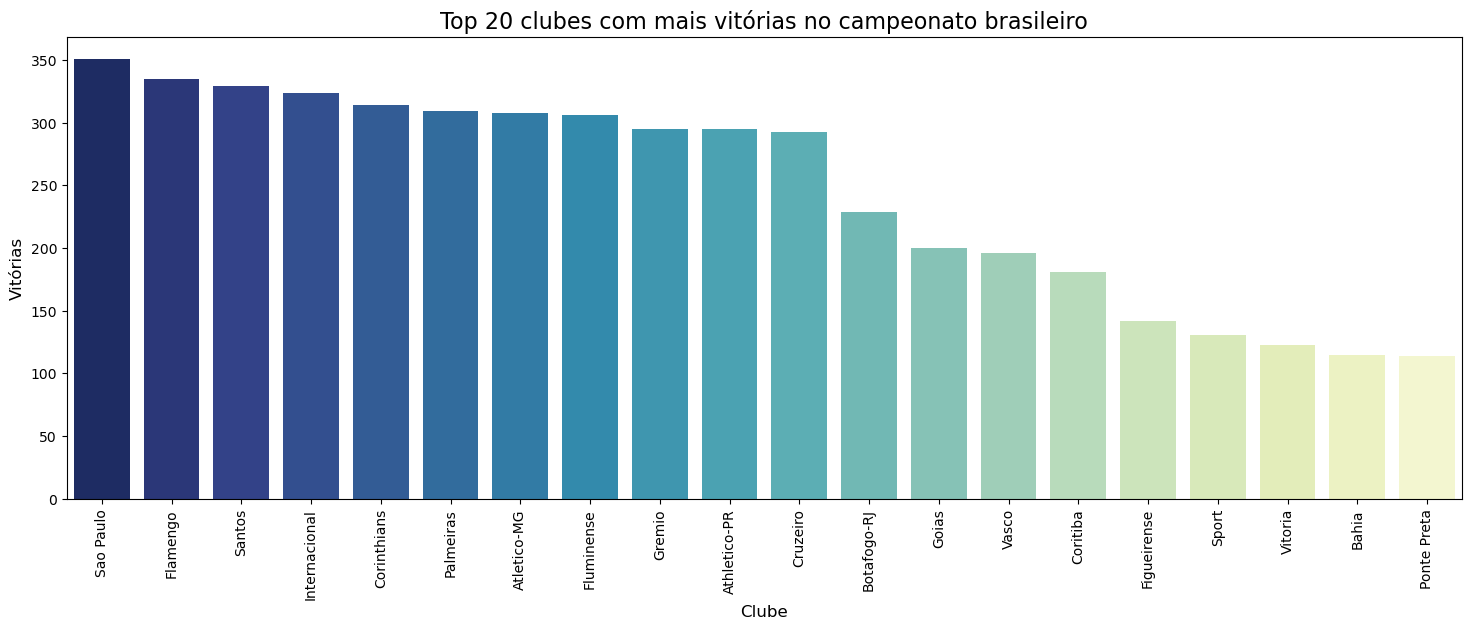

In [8]:
# Maiores vencedores
mais_vitorias = partidas_br['vencedor'].value_counts()
mais_vitorias = mais_vitorias[1:]
mais_vitorias=mais_vitorias.to_frame().reset_index()
mais_vitorias=mais_vitorias.rename(columns={'index':'clube', 'vencedor':'vitorias'})

fig, ax = plt.subplots(figsize = (18,6))
ax = sns.barplot(data=mais_vitorias[:20], x = 'clube', y='vitorias', palette = 'YlGnBu_r')
plt.title("Top 20 clubes com mais vitórias no campeonato brasileiro", fontsize = 16)
plt.xticks(fontsize = 10, rotation=90)
plt.xlabel('Clube', fontsize = 12)
plt.ylabel('Vitórias', fontsize = 12)

In [9]:
mais_vitorias.head()

,clube,vitorias
0,Sao Paulo,351
1,Flamengo,335
2,Santos,329
3,Internacional,324
4,Corinthians,314


Text(0.5, 0, 'Número de gols')

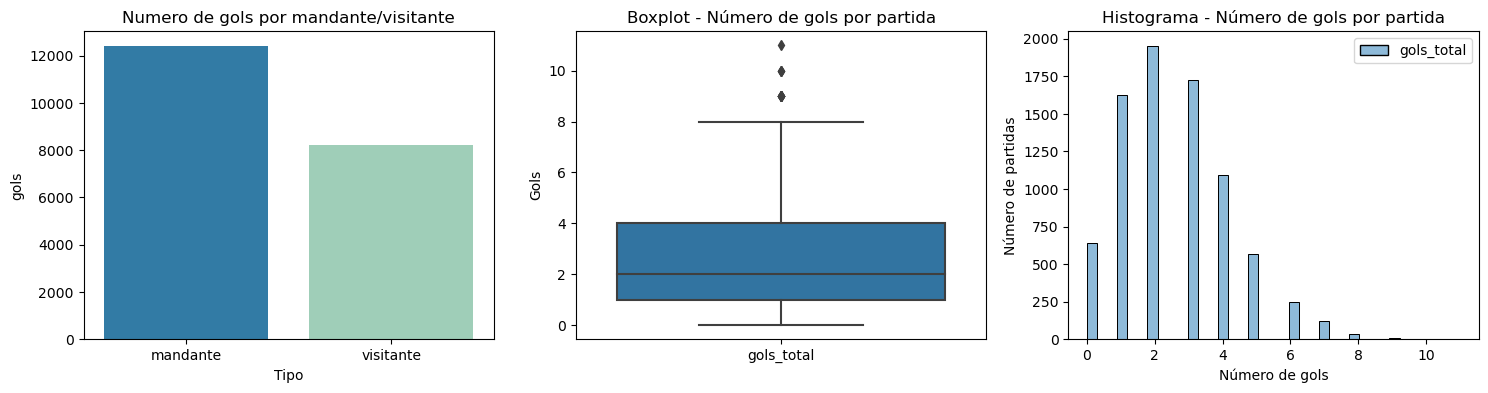

In [10]:
# GOlS

#numero de gols mandante e visitante
numero_gols = {'mandante':partidas_br['mandante_Placar'].sum(), 'visitante':partidas_br['visitante_Placar'].sum()}
numero_gols = pd.DataFrame({'Tipo':numero_gols.keys(), 'gols':numero_gols.values()})

fig, axes = plt.subplots(1, 3, figsize = (18,4))

#plot gols
sns.barplot(data=numero_gols, x='Tipo', y='gols', palette = 'YlGnBu_r', ax=axes[0])
axes[0].set_title('Numero de gols por mandante/visitante')

#gols por partida
gols_partida=pd.DataFrame(partidas_br['mandante_Placar']+partidas_br['visitante_Placar'], columns=['gols_total'])

#plot boxplot gols por partida
sns.boxplot(data=gols_partida, ax= axes[1])
axes[1].set_title('Boxplot - Número de gols por partida')
axes[1].set_ylabel('Gols')

#plot histograma gols 
sns.histplot(data=gols_partida, ax=axes[2])
axes[2].set_title('Histograma - Número de gols por partida')
axes[2].set_ylabel('Número de partidas')
axes[2].set_xlabel('Número de gols')

In [11]:
#Encontrar partida com mais gols
partida_mais_gols = gols_partida.loc[gols_partida['gols_total']==gols_partida['gols_total'].max()].index.values.astype(int)[0]
partidas_br[['data', 'mandante', 'visitante','mandante_Placar', 'visitante_Placar']].iloc[partida_mais_gols]

data                22/10/2003
mandante                 Bahia
visitante               Santos
mandante_Placar              4
visitante_Placar             7
Name: 450, dtype: object

Analisando os dados de partidas, temos o São Paulo com o maior número de vitórias no campeonato (351), seguido por Flamengo (335) e Santos (329). Em relação aos gols, o número de gols marcados pelos mandantes prevalecem sobre o número de gols marcados pelos visitantes. Comparando o número de gols marcados por partida, temos uma média de 1,547 gols de mandante por partida e 1,025 gols de visitante por partida, com 50% das partidas com 2 gols ou menos, enquanto somente 25% das partidas tiveram 4 gols ou mais. A partida com maior número de gols da história do Brasileirao foi Bahia 4 x 7 Santos, em 2003, com um total de 11 gols.

In [12]:
from CampeonatoBrasileiro import Brasileirao as br

In [13]:
brasileiro = br(partidas_br)

ano = 2016
brasileiro.Tabela(ano)

,clube,pontos,partidas,vitorias,empates,derrotas,gols_pro,gols_contra,saldo
0,Palmeiras,80,38,24,8,6,62,32,30
1,Santos,71,38,22,5,11,59,35,24
2,Flamengo,71,38,20,11,7,52,35,17
3,Atletico-MG,62,37,17,11,9,61,50,11
4,Botafogo-RJ,59,38,17,8,13,43,39,4
5,Athletico-PR,57,38,17,6,15,38,32,6
6,Corinthians,55,38,15,10,13,48,42,6
7,Ponte Preta,53,38,15,8,15,48,52,-4
8,Gremio,53,38,14,11,13,41,44,-3
9,Sao Paulo,52,38,14,10,14,44,36,8


In [14]:
max_partidas=[]
min_partidas=[]
ano_partidas=[]

for ano_i in range(2003,2023):
    tab_sup = brasileiro.Tabela(ano_i)
    ano_partidas.append(ano_i)
    min_partidas.append(tab_sup['partidas'].min())
    max_partidas.append(tab_sup['partidas'].max())
                                
dict_partidas = {'temporada':ano_partidas, 'min_partidas': min_partidas, 'max_partidas':max_partidas}  

df_partidas = pd.DataFrame.from_dict(dict_partidas)
df_partidas.head(20)


,temporada,min_partidas,max_partidas
0,2003,46,46
1,2004,46,46
2,2005,42,42
3,2006,38,38
4,2007,38,38
5,2008,38,38
6,2009,38,38
7,2010,38,38
8,2011,38,38
9,2012,38,38


In [15]:
df_ajustado=brasileiro.df_pontos
df_ajustado.head()

df_ajustado.loc[(df_ajustado['rodata']==38)&(df_ajustado['temporada']==2020)]

,ID,rodata,data,mandante,visitante,vencedor,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado,temporada,pontos_mandante,pontos_visitante
7255,7256,38,2021-02-25,Bragantino,Gremio,Bragantino,1,0,SP,RS,2020,3,0
7256,7257,38,2021-02-25,Bahia,Santos,Bahia,2,0,BA,SP,2020,3,0
7257,7258,38,2021-02-25,Athletico-PR,Sport,Athletico-PR,2,0,PR,PE,2020,3,0
7258,7259,38,2021-02-25,Atletico-GO,Coritiba,Atletico-GO,3,1,GO,PR,2020,3,0
7259,7260,38,2021-02-25,Internacional,Corinthians,-,0,0,RS,SP,2020,1,1
7260,7261,38,2021-02-25,Ceara,Botafogo-RJ,Ceara,2,1,CE,RJ,2020,3,0
7261,7262,38,2021-02-25,Sao Paulo,Flamengo,Sao Paulo,2,1,SP,RJ,2020,3,0
7262,7263,38,2021-02-25,Atletico-MG,Palmeiras,Atletico-MG,2,0,MG,SP,2020,3,0
7263,7264,38,2021-02-25,Vasco,Goias,Vasco,3,2,RJ,GO,2020,3,0
7264,7265,38,2021-02-25,Fluminense,Fortaleza,Fluminense,2,0,RJ,CE,2020,3,0


Em relação ao número de partidas, no primeiro campeonato de pontos corridos cada clube disputou 46 partidas. Em 2005 houve uma redução para 42 partidas, e a partir de 2006 adotou-se o modelo atual, com 38 partidas disputadas por clube. Nota-se uma diferença no Brasileirão de 2016, em que dois clubes disputaram 37 partidas. Isso se deve ao fatídico acidente com a equipe da Chapecoense, que ocorreu em novembro de 2016 quando a equipe viajava para a Colômbia para a disputa da final da Copa Sul-Americana. Por conta desse ocorrido, a partida Chapecoense x Atletico MG não ocorreu, sendo decretado um WO duplo (fonte:https://www.uol.com.br/esporte/futebol/campeonatos/brasileiro/serie-a/ultimas-noticias/2016/12/11/chapecoense-x-atletico-mg.htm).

Quanto às datas, existe uma divergência em relação ao Campeonato Brasileiro de 2020. Por conta da pandemia causada pela COVID-19 houve uma paralisação de atividades esportivas no país, o que impactou o Campeonato Brasileiro daquele ano. O Campeonato Brasileiro de 2020 teve sua última rodada no dia 25.02.2021.

### 3.3.2 Dataset: Campeonato Brasileiro Estatisticas Full

In [16]:
stats.shape

(16050, 13)

In [17]:
stats.tail()

,partida_id,rodata,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
16045,8023,38,Atletico-MG,17,7,41%,351,82%,19,6,0,0,4
16046,8024,38,Internacional,15,8,48%,287,77%,13,2,0,1,6
16047,8024,38,Palmeiras,11,2,52%,306,82%,17,3,0,2,5
16048,8025,38,Goias,6,2,35%,330,80%,12,2,0,1,3
16049,8025,38,Sao Paulo,13,7,65%,591,90%,14,1,0,0,4


In [18]:
stats['partida_id'].nunique()

8025

In [19]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16050 entries, 0 to 16049
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   partida_id       16050 non-null  int64 
 1   rodata           16050 non-null  int64 
 2   clube            16050 non-null  object
 3   chutes           16050 non-null  int64 
 4   chutes_no_alvo   16050 non-null  int64 
 5   posse_de_bola    6838 non-null   object
 6   passes           16050 non-null  int64 
 7   precisao_passes  6838 non-null   object
 8   faltas           16050 non-null  int64 
 9   cartao_amarelo   16050 non-null  int64 
 10  cartao_vermelho  16050 non-null  int64 
 11  impedimentos     16050 non-null  int64 
 12  escanteios       16050 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.6+ MB


O arquivo 'campeonato-brasileiro-estatisticas-full.csv' contém informações sobre estatísticas dos jogos realizados no Campeonato Brasileiro. Existem 16025 entradas no DataFrame mas, em relação ao ID da partida, somente 8025 valores únicos, o que indica que as partidas estão duplicadas, sendo uma linha para cada time que jogou a partida. Quantos aos dados disponíveis, existem valores nulos em 'posse_de_bola' e 'precisão_passes', e verificando as outras colunas, muitas partidas não possuem as estatísticas registradas (valor igual a zero), o que indica que existem muitos dados faltantes.

Sobre o tipo de dado para cada coluna, as colunas "posse_de_bola" e "precisao_passes" estão representadas como string. Para as análises posteriores, essas colunas serão convertidas para float, transformando o valor em porcentagem para um valor em decimais. 

In [20]:
stats.loc[stats['passes']!=0].head()

,partida_id,rodata,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
9458,4741,13,Chapecoense,15,0,35%,280,None,19,4,0,0,8
9459,4741,13,Flamengo,9,0,65%,509,None,13,1,0,1,5
9594,4808,20,Palmeiras,10,0,44%,384,None,18,4,0,1,5
9595,4808,20,Criciuma,10,0,56%,471,None,17,3,0,1,6
9644,4833,22,Coritiba,9,0,43%,360,None,14,5,0,1,11


In [21]:
#Join tabela estatisticas com informacoes de partidas'
df_ajustado=df_ajustado.rename(columns={'ID':'partida_id'})

stat_join = pd.merge(stats, df_ajustado, on=['partida_id'], how="inner")

stat_join_notnull = stat_join.loc[(stat_join['passes']!=0)&(stat_join['precisao_passes']!='None')]
stat_join_notnull.head()

,partida_id,rodata_x,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,...,mandante,visitante,vencedor,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado,temporada,pontos_mandante,pontos_visitante
12250,6126,1,Cruzeiro,12,2,40%,425,81%,20,3,...,Cruzeiro,Gremio,Gremio,0,1,MG,RS,2018,0,3
12251,6126,1,Gremio,6,2,60%,649,86%,15,1,...,Cruzeiro,Gremio,Gremio,0,1,MG,RS,2018,0,3
12252,6127,1,Vitoria,21,6,66%,545,88%,24,3,...,Vitoria,Flamengo,-,2,2,BA,RJ,2018,1,1
12253,6127,1,Flamengo,10,5,34%,286,72%,10,2,...,Vitoria,Flamengo,-,2,2,BA,RJ,2018,1,1
12254,6128,1,Santos,22,3,54%,532,90%,7,0,...,Santos,Ceara,Santos,2,0,SP,CE,2018,3,0


In [22]:
Count_partidas = stat_join_notnull[['rodata_x', 'temporada']]
Count_partidas.groupby('temporada')['rodata_x'].count()

temporada
2018    760
2019    714
2020    758
2021    760
2022    760
Name: rodata_x, dtype: int64

Quanto aos valores presentes no Dataset, nota-se que as estatísticas mais completas estão presentes somente a partir da temporada de 2018. Mesmo assim, considerando que em cada temporada se realizam 380 partidas (totalizando 760 entradas relacionadas a estatísticas), existem jogos faltantes nas temporadas de 2019 e 2020.  

In [23]:
stat_join_notnull.describe()

,partida_id,rodata_x,chutes,chutes_no_alvo,passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios,rodata_y,mandante_Placar,visitante_Placar,temporada,pontos_mandante,pontos_visitante
count,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,7079.876866,19.472281,13.019723,4.226546,423.841684,14.858742,2.260928,0.131397,1.438966,5.253198,19.472281,1.374733,0.940832,2020.012260,1.707356,1.010128
std,550.524226,10.976176,5.081856,2.329407,102.109102,4.338611,1.425437,0.373125,1.331090,3.004993,10.976176,1.141440,0.961102,1.419053,1.281565,1.202239
min,6126.000000,1.000000,1.000000,0.000000,170.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2018.000000,0.000000,0.000000
25%,6597.750000,10.000000,9.000000,3.000000,349.000000,12.000000,1.000000,0.000000,0.000000,3.000000,10.000000,1.000000,0.000000,2019.000000,1.000000,0.000000
50%,7087.500000,19.000000,12.000000,4.000000,419.000000,15.000000,2.000000,0.000000,1.000000,5.000000,19.000000,1.000000,1.000000,2020.000000,1.000000,1.000000
75%,7556.250000,29.000000,16.000000,6.000000,491.000000,18.000000,3.000000,0.000000,2.000000,7.000000,29.000000,2.000000,1.000000,2021.000000,3.000000,1.000000
max,8025.000000,38.000000,37.000000,16.000000,848.000000,31.000000,10.000000,3.000000,9.000000,23.000000,38.000000,6.000000,5.000000,2022.000000,3.000000,3.000000


Text(0.5, 1.0, 'Boxplot - Escanteios')

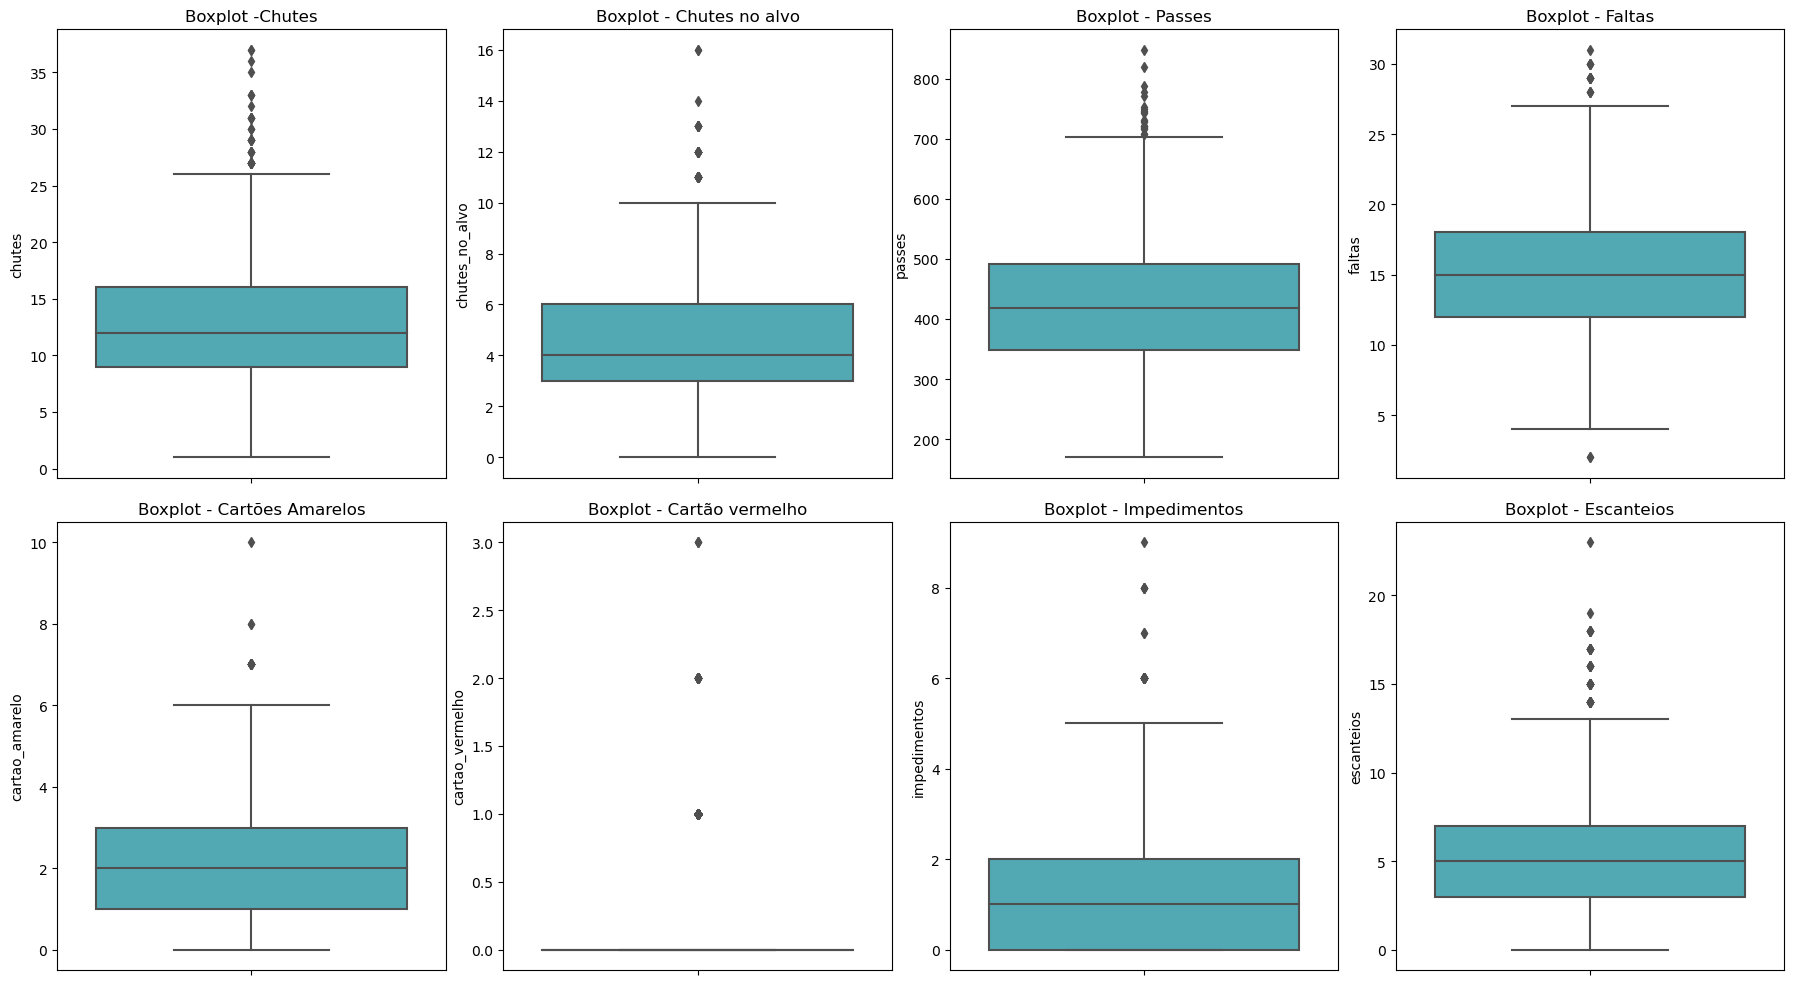

In [24]:
fig, axes = plt.subplots(2, 4, figsize = (18,10))
plt.tight_layout()

sns.boxplot(y='chutes',data=stat_join_notnull, ax= axes[0,0], palette = 'YlGnBu_r')
axes[0,0].set_title('Boxplot -Chutes')

sns.boxplot(y='chutes_no_alvo',data=stat_join_notnull, ax= axes[0,1], palette = 'YlGnBu_r')
axes[0,1].set_title('Boxplot - Chutes no alvo')

sns.boxplot(y='passes',data=stat_join_notnull, ax= axes[0,2], palette = 'YlGnBu_r')
axes[0,2].set_title('Boxplot - Passes')

sns.boxplot(y='faltas',data=stat_join_notnull, ax= axes[0,3], palette = 'YlGnBu_r')
axes[0,3].set_title('Boxplot - Faltas')

sns.boxplot(y='cartao_amarelo',data=stat_join_notnull, ax= axes[1, 0], palette = 'YlGnBu_r')
axes[1,0].set_title('Boxplot - Cartões Amarelos')

sns.boxplot(y='cartao_vermelho',data=stat_join_notnull, ax= axes[1,1], palette = 'YlGnBu_r')
axes[1,1].set_title('Boxplot - Cartão vermelho')

sns.boxplot(y='impedimentos',data=stat_join_notnull, ax= axes[1,2], palette = 'YlGnBu_r')
axes[1,2].set_title('Boxplot - Impedimentos')

sns.boxplot(y='escanteios',data=stat_join_notnull, ax= axes[1,3], palette = 'YlGnBu_r')
axes[1,3].set_title('Boxplot - Escanteios')


Em relação aos chutes, temos uma média de 13,01 chutes por equipe por partida, com uma média de 4,22 chutes no alvo. 50% das partidas tiveram 12 chutes ou menos por equipe, e a o número máximo de chutes de um time em uma partida foi 37, ou aproximadamente um chute a cada 2,43 minutos. As equipes tem uma média de 423,8 passes por jogo, e somente 25% das partidas tem mais de 491 passes de uma equipe. 

Verificando as variveis que envolvem a arbitragem, 75% dos jogos do Campeonato Brasileiro tem 2 ou menos impedimentos marcados por equipe. Quanto as faltas, a maioria das partidas tem 18 faltas ou menos por equipe, sendo 31 o número maximo de faltas cometidas para uma equipe. Cartões amarelos são mostrados em ao menos 75% dos jogos, com uma média de 2,26 cartões por equipe por partida. Cartões vermelhos são mais raros de serem mostrados nas partidas, com média de 0,1 cartão vermelho por equipe por partida. 

## 3.4 Análise: Desempenho geral - campeonato brasileiro

Neste tópico, o objetivo é utilizar como guia algumas citações do mundo do futebol para verificar se existe um paralelo com o que mostra os dados relacionados às partidas do Campeonato brasileiro. Ao final, a ideia é entender melhor o estilo de jogo dos times campeões brasileiros dos últimos anos.

### 3.4.1 “A torcida paga ingresso para ver o time vencer.” Muricy Ramalho

O fator casa é extremamente valorizado no futebol. Historicamente existe uma vantagem do mandante em relação ao visitante no campeonato brasileiro? Além disso, em 2020 o Brasileirão foi realizado sem público nos estádios por conta da pandemia. Houve alguma alteração em relação a relação de mandante x visitante?


In [25]:
df_mandante = df_ajustado

#Criação de duas nova colunas: resultado_mandante e aproveitamento_mandante
mandante_conditions = [(df_mandante['vencedor'] == df_mandante['mandante']),
                             (df_mandante['vencedor'] == df_mandante['visitante']),
                             (df_mandante['vencedor'] == '-')]

mandante_values = ["Vitoria", "Derrota", "Empate"]
mandante_aproveitamento = [1, 0, 0.333]
df_mandante['resultado_mandante'] = np.select(mandante_conditions, mandante_values)
df_mandante['aproveitamento_mandante']=np.select(mandante_conditions, mandante_aproveitamento)

df_mandante.head()

,partida_id,rodata,data,mandante,visitante,vencedor,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado,temporada,pontos_mandante,pontos_visitante,resultado_mandante,aproveitamento_mandante
0,1,1,2003-03-29,Guarani,Vasco,Guarani,4,2,SP,RJ,2003,3,0,Vitoria,1.000
1,2,1,2003-03-29,Athletico-PR,Gremio,Athletico-PR,2,0,PR,RS,2003,3,0,Vitoria,1.000
2,3,1,2003-03-30,Flamengo,Coritiba,-,1,1,RJ,PR,2003,1,1,Empate,0.333
3,4,1,2003-03-30,Goias,Paysandu,-,2,2,GO,PA,2003,1,1,Empate,0.333
4,5,1,2003-03-30,Internacional,Ponte Preta,-,1,1,RS,SP,2003,1,1,Empate,0.333


[[<matplotlib.axis.XTick at 0x13c7b5c9660>,

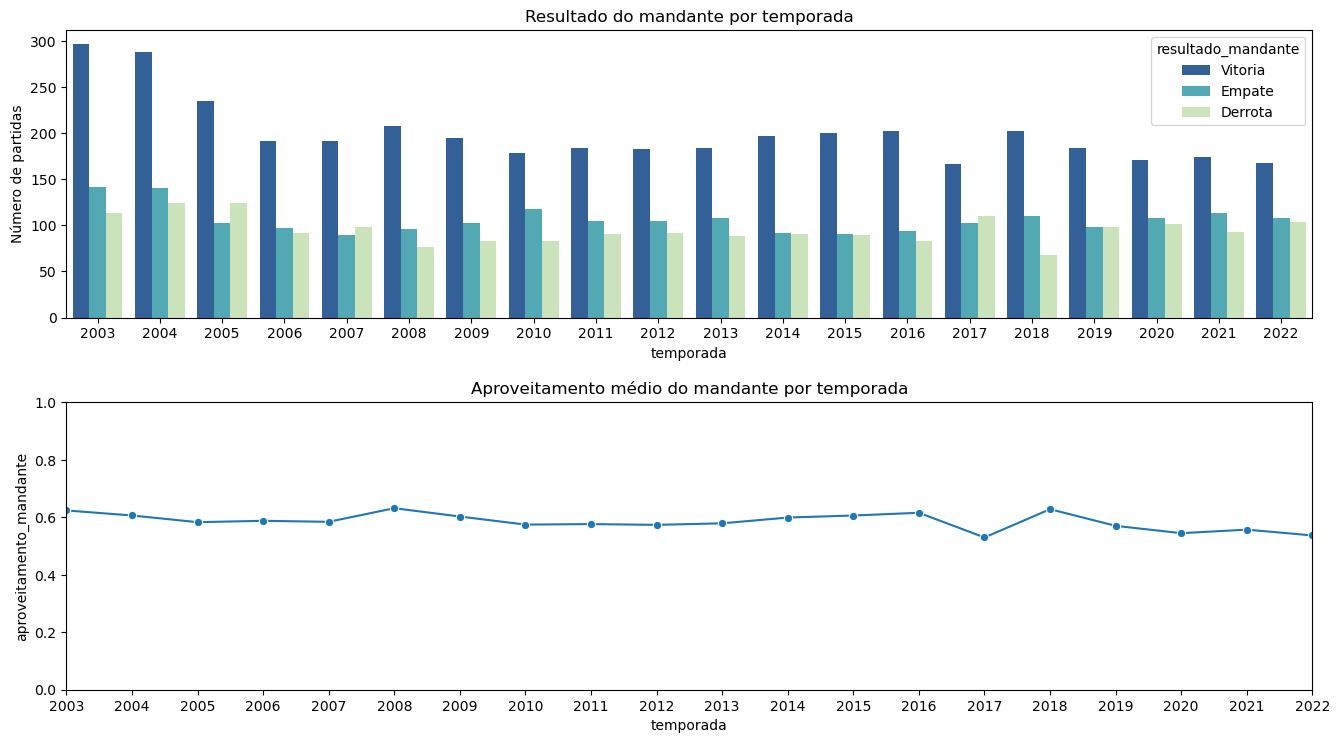

In [26]:
fig, ax = plt.subplots(2, 1,figsize = (14,8))
fig.tight_layout(pad=4)

sns.countplot(x='temporada', hue = 'resultado_mandante', palette = 'YlGnBu_r', data = df_mandante, ax=ax[0])
ax[0].set_title('Resultado do mandante por temporada')
ax[0].set_ylabel('Número de partidas')

count_aproveitamento = df_mandante[['temporada', 'aproveitamento_mandante']]
aproveitamento_medio = count_aproveitamento.groupby('temporada').mean()
ax[1] = sns.lineplot(x="temporada", y='aproveitamento_mandante', data=aproveitamento_medio, marker = 'o')
ax[1].set_title('Aproveitamento médio do mandante por temporada')
ax[1].set_ylim(0,1)
ax[1].set_xlim(2003,2022)
ax[1].set(xticks=range(2003, 2023))

In [27]:
print(count_aproveitamento.mean())
print(aproveitamento_medio.loc[aproveitamento_medio['aproveitamento_mandante']==aproveitamento_medio['aproveitamento_mandante'].max()])
print(aproveitamento_medio.loc[aproveitamento_medio['aproveitamento_mandante']==aproveitamento_medio['aproveitamento_mandante'].min()])

temporada                  2012.037134
aproveitamento_mandante       0.586662
dtype: float64
           aproveitamento_mandante
temporada                         
2008                      0.631495
           aproveitamento_mandante
temporada                         
2017                      0.529734


Com os gráficos acima, é possivel notar que historicamente o número de vitórias do mandante é maior que o número de empates e derrotas. Em alguns anos notou-se que ocorreram mais derrotas que empates para mandantes, mas na maior parte dos campeonatos a quantidade de derrotas do mandante é menor que a de empates.

Em relação ao aproveitamento, temos uma média de aproximadamente 58,7% de aproveitamento dos pontos para o mandante. O maior aproveitamento de pontos do mandante foi de 63,15% e ocorreu no ano de 2008, e o menor aproveitamento foi notado no ano de 2017, com aproximadamente 53%.

Em relação ao ano de 2020, em que o campeonato foi disputado sem torcida por conta da pandemia, notou-se uma quantidade um pouco menor de vitorias se comparado ao ano anterior. Verificando o aproveitamento de pontos, não se notou uma grande diferença, estando acima do mínimo encontrado.

### 3.4.2 "Clássico é um campeonato a parte"

Essa frase é repetida toda vez em que temos um clássico regional disputado no país, e é utilizada principalmente em momentos de grande diferença de desempenho dos dois times que vão disputar a partida. Diz-se que em clássico não há favorito, que a classificação geral é deixada de lado e que a rivalidade e o ambiente de um clássico muitas vezes faz com que o time considerado mais fraco vença. Mas, verificando o histórico, isso realmente acontece com frequência?

Para este tópico foram considerados os seguintes clássicos regionais:
* Corinthians x Palmeiras
* Corinthians x São Paulo
* Corinthians x Santos
* Palmeiras x São Paulo
* Palmeiras x Santos
* São Paulo x Santos
* Gremio x Internacional
* Cruzeiro x Atletico-MG
* Atletico-MG x America-MG
* Cruzeiro x America-MG
* Bahia x Vitoria
* Flamengo x Vasco
* Flamengo x Fluminense
* Flamengo x Botafogo
* Vasco x Fluminense
* Vasco x Botafogo
* Botafogo x Fluminense
* Fortaleza x Ceará

Para as análises e determinação do time com melhor desempenho, será considerado a classificação final do campeonato naquele ano, e não a classificação no momento em que a partida foi disputada.

In [28]:
#Separação - classicos regionais
classicos_SP = df_ajustado.loc[(df_ajustado['mandante'].isin(['Corinthians', 'Palmeiras', 'Sao Paulo', 'Santos']))&(df_ajustado['visitante'].isin(['Corinthians', 'Palmeiras', 'Sao Paulo', 'Santos']))]
classicos_RJ = df_ajustado.loc[(df_ajustado['mandante'].isin(['Flamengo', 'Botafogo', 'Vasco', 'Fluminense']))&(df_ajustado['visitante'].isin(['Flamengo', 'Botafogo', 'Vasco', 'Fluminense']))]
classicos_RS = df_ajustado.loc[(df_ajustado['mandante'].isin(['Gremio', 'Internacional']))&(df_ajustado['visitante'].isin(['Gremio', 'Internacional']))]
classicos_BA = df_ajustado.loc[(df_ajustado['mandante'].isin(['Bahia', 'Vitoria']))&(df_ajustado['visitante'].isin(['Bahia', 'Vitoria']))]
classicos_CE = df_ajustado.loc[(df_ajustado['mandante'].isin(['Fortaleza', 'Ceara']))&(df_ajustado['visitante'].isin(['Fortaleza', 'Ceara']))]
classicos_MG = df_ajustado.loc[(df_ajustado['mandante'].isin(['Atletico-MG', 'Cruzeiro', 'America-MG']))&(df_ajustado['visitante'].isin(['Atletico-MG', 'Cruzeiro', 'America-MG']))]

In [29]:
#Classificacao geral do campeonato (por temporada)
clubes = brasileiro.Clubes_geral()
temporadas = range(2002,2023)

clubes = clubes['clube'].values.tolist()

clube_class = []
temporada_class = []
classificacao = []

for i in clubes:
    for j in  temporadas:
        clube_class.append(i)
        temporada_class.append(j)
        if brasileiro.Classificacao(j, i).size==1:
            classificacao.append(brasileiro.Classificacao(j, i).item())
        else:
            classificacao.append(0)

dict_class = {'clubes':clube_class, 'temporada':temporada_class, 'classificacao':classificacao}
class_geral = pd.DataFrame.from_dict(dict_class)

In [30]:
#Montagem dataframe com classificacao
classicos=pd.concat([classicos_SP, classicos_RJ, classicos_RS, classicos_BA, classicos_CE, classicos_MG])
classicos.reset_index(drop=True)

class_geral=class_geral.rename(columns={'clubes':'mandante', 'classificacao':'classificacao_mandante'})

classicos = pd.merge(classicos, class_geral, on=['mandante','temporada'], how="inner")

class_geral=class_geral.rename(columns={'mandante':'visitante', 'classificacao_mandante':'classificacao_visitante'})
classicos = pd.merge(classicos, class_geral, on=['visitante','temporada'], how="inner")


In [31]:
#Adicao de nova coluna: Resultado do melhor classificado
classico_conditions = [((classicos['vencedor'] == classicos['mandante'])&(classicos['classificacao_mandante']>classicos['classificacao_visitante'])),
                       ((classicos['vencedor'] == classicos['mandante'])&(classicos['classificacao_mandante']<classicos['classificacao_visitante'])),
                       ((classicos['vencedor'] == classicos['visitante'])&(classicos['classificacao_mandante']>classicos['classificacao_visitante'])),
                       ((classicos['vencedor'] == classicos['visitante'])&(classicos['classificacao_mandante']<classicos['classificacao_visitante'])),
                        (classicos['vencedor'] == '-')]

vitoria_values_1 = ['Derrota', 'Vitoria', 'Vitoria', 'Derrota', 'Empate']
classicos['resultado_melhor_classificado'] = np.select(classico_conditions, vitoria_values_1)

Text(0.5, 0, 'Número de partidas')

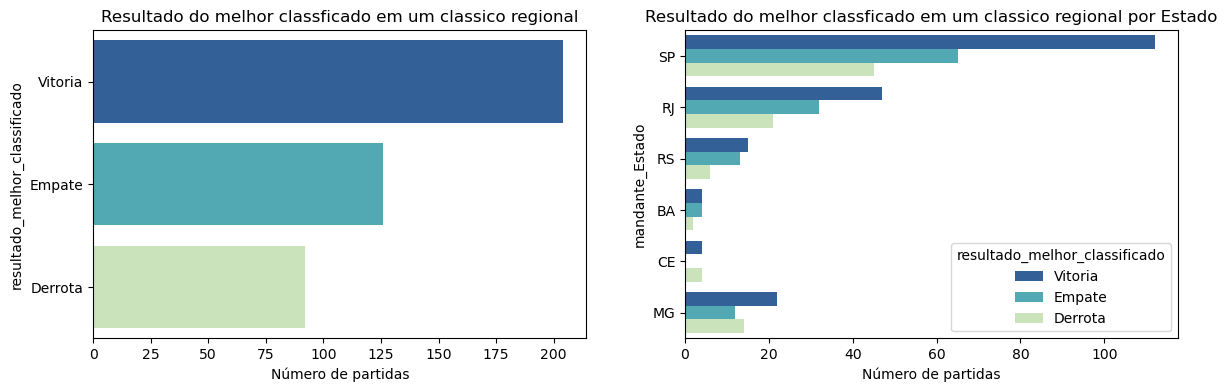

In [32]:
#Graficos: Resultado do melhor classificado geral e por estado
fig, ax = plt.subplots(1,2,figsize=(14,4))


sns.countplot(y='resultado_melhor_classificado', palette = 'YlGnBu_r', data = classicos , ax = ax[0], orient = 'h')
ax[0].set_title('Resultado do melhor classficado em um classico regional')
ax[0].set_xlabel('Número de partidas')

sns.countplot(y='mandante_Estado', palette = 'YlGnBu_r', data = classicos, hue = 'resultado_melhor_classificado', ax = ax[1], orient = 'h')
ax[1].set_title('Resultado do melhor classficado em um classico regional por Estado')
ax[1].set_xlabel('Número de partidas')

Verificando o panorama geral, o número de vitórias do time com melhor classificação ao final do campeonato é superior ao número de empates e derrotas em um clássico regional. Ao verificar os resultados por Estado, nota-se uma maior discrepância em São Paulo e no Rio de Janeiro, em que o time melhor classificado leva larga vantagem sobre o adversário. No Rio Grande do Sul e na Bahia nota-se um grande número de empates nessas partidas, enquanto que no Ceará existe um equilíbrio entre o número de vitórias e derrotas. Em Minas Gerais o número de derrotas do time melhor classificado supera o número de empates nos confrontos.

### 3.4.3 "Títulos de liga são ganhos nos últimos oito jogos, mas eles são perdidos nos primeiros oito" Pep Guardiola

A famosa frase do técnico Pep Guardiola é sempre lembrada em momentos em que se diz que o Campeonato Brasileiro é muito longo e que ainda há muitos jogos restantes. O técnico multicampeão e vencedor das ligas da Espanha, Alemanha e Inglaterra cita a relevância tanto dos jogos inicias como dos finais na disputa de um título de campeonato. Historicamente no campeonato brasileiro, existe um paralelo?

In [33]:
#Extração dos dados para as primeiras 8 partidas, ultimas 8 partidas e classificação final
[pontos_prim8_2018, pontos_ult8_2018, pontos_final_2018] = brasileiro.Guardiola(2018)
[pontos_prim8_2019, pontos_ult8_2019, pontos_final_2019] = brasileiro.Guardiola(2019)
[pontos_prim8_2020, pontos_ult8_2020, pontos_final_2020] = brasileiro.Guardiola(2020)
[pontos_prim8_2021, pontos_ult8_2021, pontos_final_2021] = brasileiro.Guardiola(2021)
[pontos_prim8_2022, pontos_ult8_2022, pontos_final_2022] = brasileiro.Guardiola(2022)

Text(0.5, 1.0, '2018 - Numero de pontos - Final')

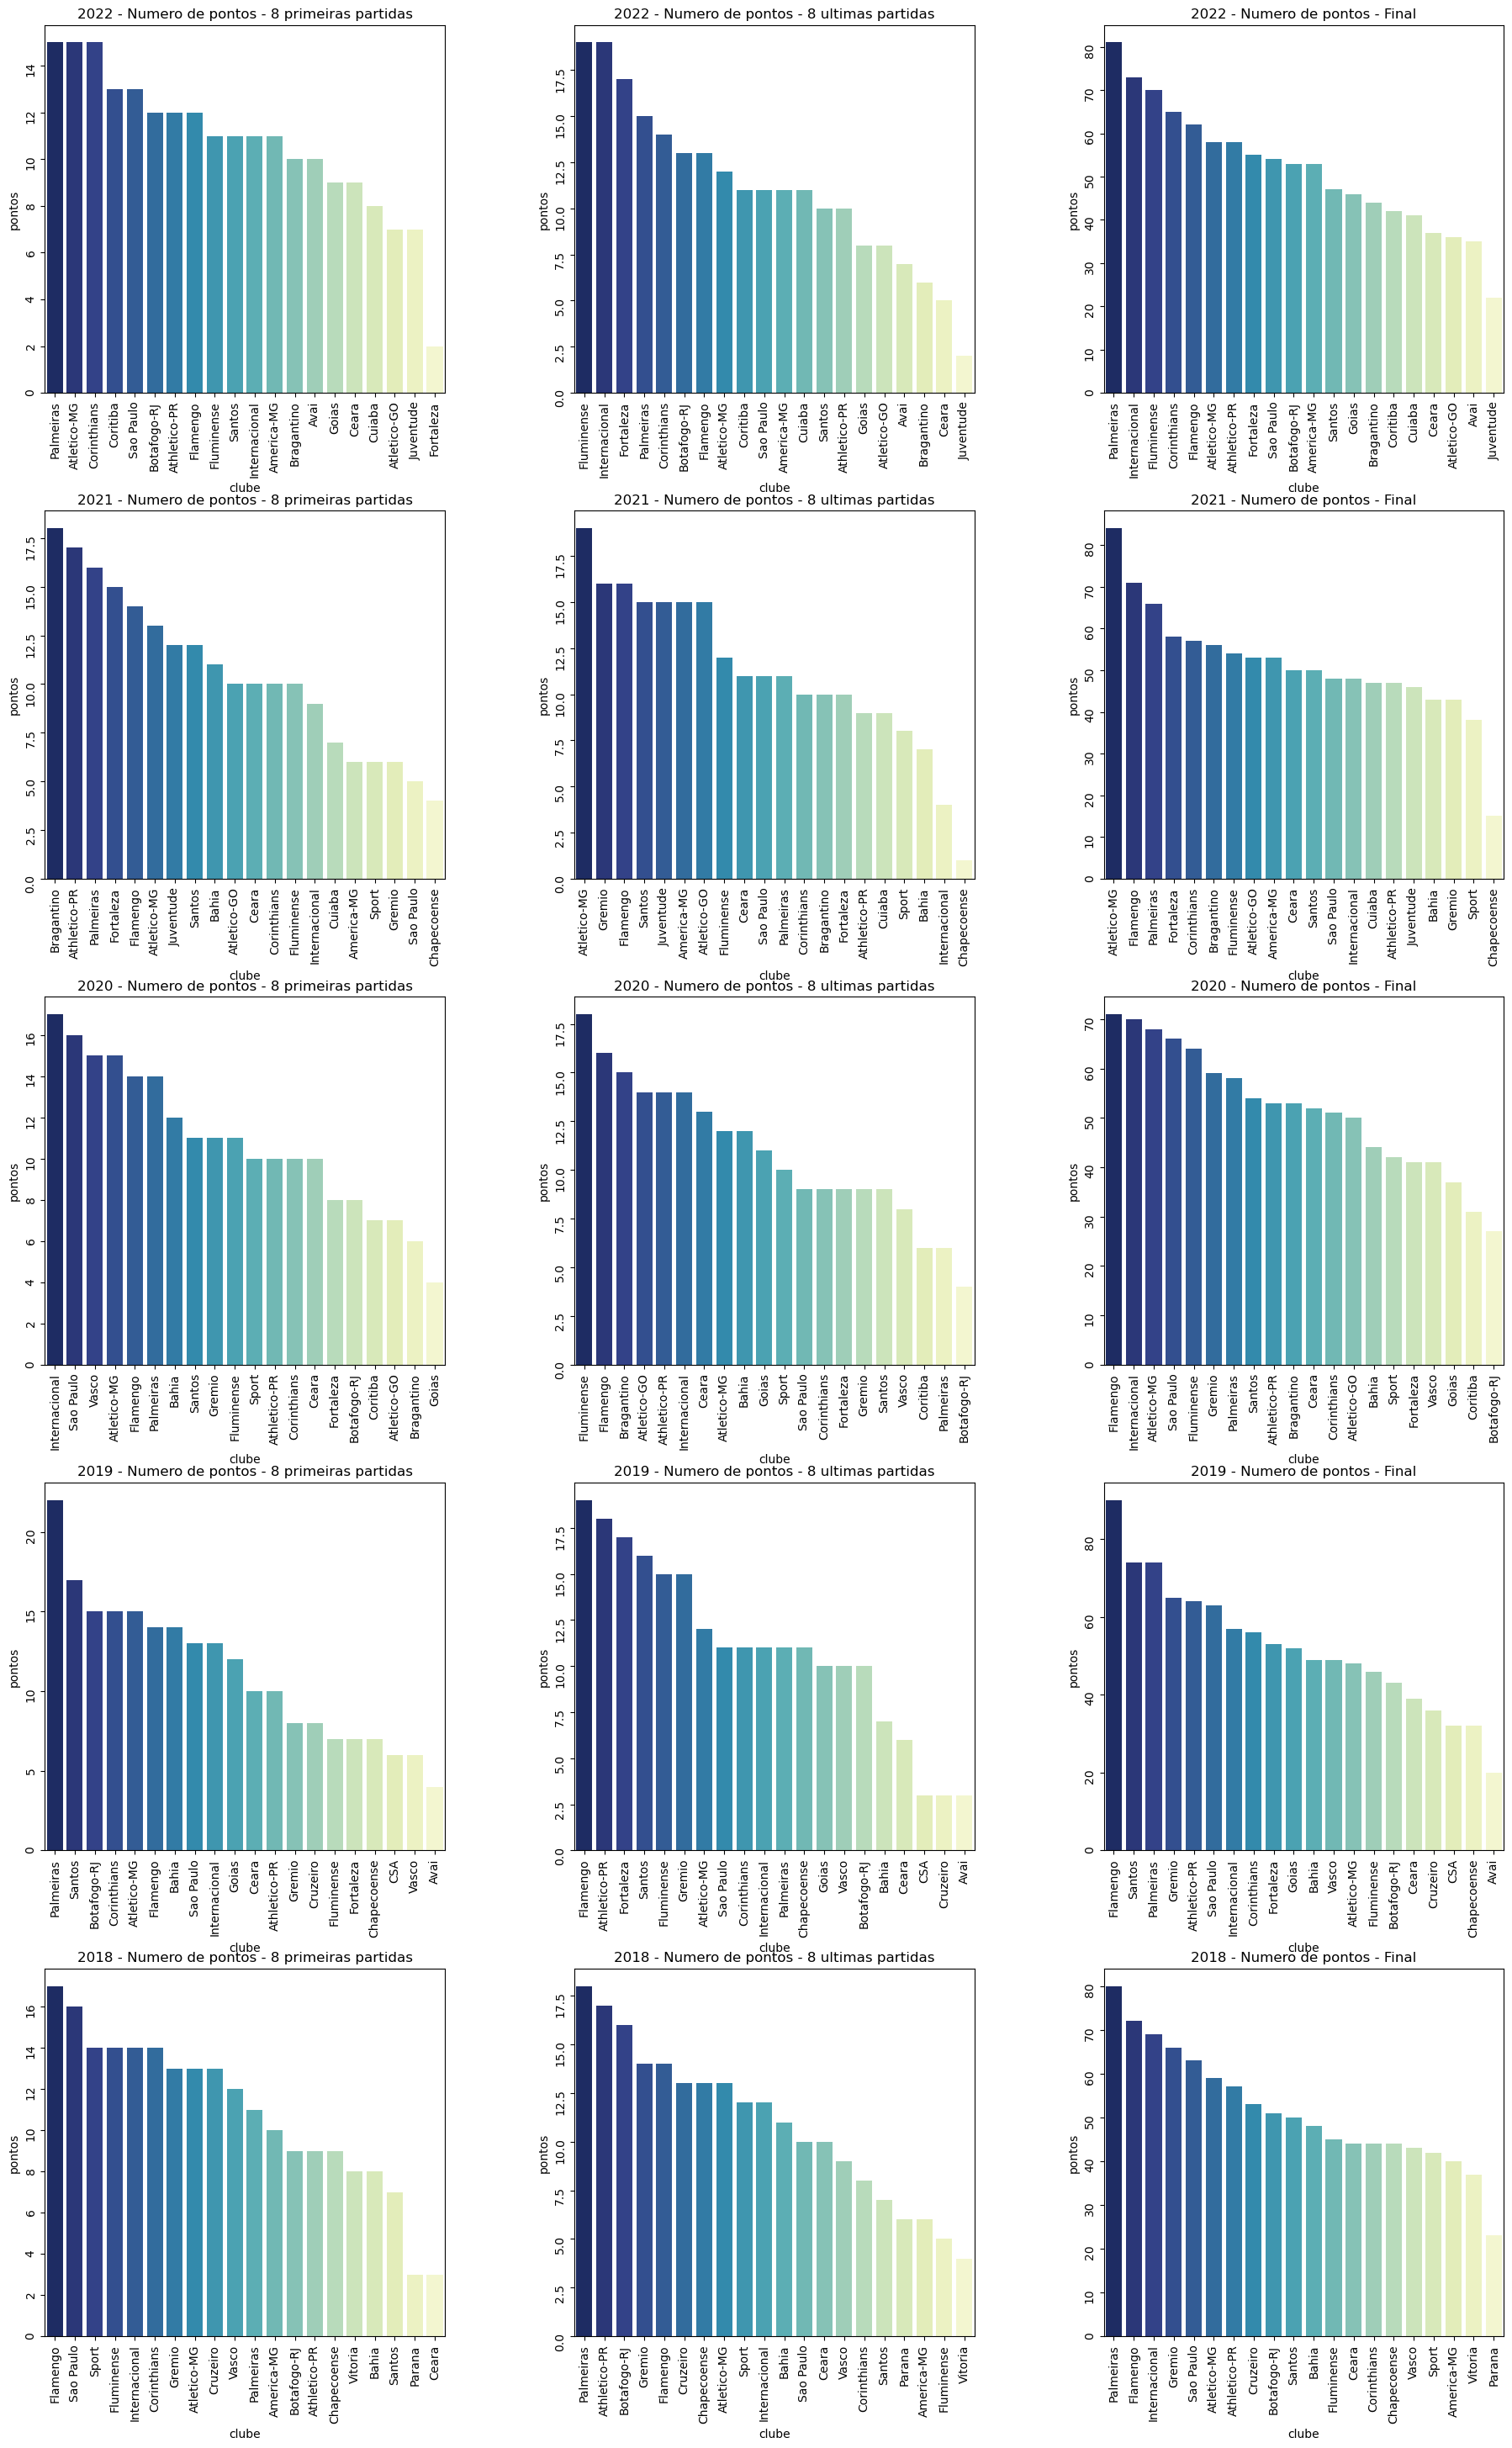

In [34]:
fig, ax = plt.subplots(5,3,figsize=(20,30))
fig.tight_layout(pad=8)

sns.barplot(x='clube', y='pontos', data=pontos_prim8_2022, ax=ax[0,0], palette ='YlGnBu_r')
ax[0,0].tick_params(labelrotation=90)
ax[0,0].set_title('2022 - Numero de pontos - 8 primeiras partidas')

sns.barplot(x='clube', y='pontos', data=pontos_ult8_2022, ax=ax[0,1], palette ='YlGnBu_r')
ax[0,1].tick_params(labelrotation=90)
ax[0,1].set_title('2022 - Numero de pontos - 8 ultimas partidas')

sns.barplot(x='clube', y='pontos', data=pontos_final_2022, ax=ax[0,2], palette ='YlGnBu_r')
ax[0,2].tick_params(labelrotation=90)
ax[0,2].set_title('2022 - Numero de pontos - Final')


sns.barplot(x='clube', y='pontos', data=pontos_prim8_2021, ax=ax[1,0], palette ='YlGnBu_r')
ax[1,0].tick_params(labelrotation=90)
ax[1,0].set_title('2021 - Numero de pontos - 8 primeiras partidas')

sns.barplot(x='clube', y='pontos', data=pontos_ult8_2021, ax=ax[1,1], palette ='YlGnBu_r')
ax[1,1].tick_params(labelrotation=90)
ax[1,1].set_title('2021 - Numero de pontos - 8 ultimas partidas')

sns.barplot(x='clube', y='pontos', data=pontos_final_2021, ax=ax[1,2], palette ='YlGnBu_r')
ax[1,2].tick_params(labelrotation=90)
ax[1,2].set_title('2021 - Numero de pontos - Final')


sns.barplot(x='clube', y='pontos', data=pontos_prim8_2020, ax=ax[2,0], palette ='YlGnBu_r')
ax[2,0].tick_params(labelrotation=90)
ax[2,0].set_title('2020 - Numero de pontos - 8 primeiras partidas')

sns.barplot(x='clube', y='pontos', data=pontos_ult8_2020, ax=ax[2,1], palette ='YlGnBu_r')
ax[2,1].tick_params(labelrotation=90)
ax[2,1].set_title('2020 - Numero de pontos - 8 ultimas partidas')

sns.barplot(x='clube', y='pontos', data=pontos_final_2020, ax=ax[2,2], palette ='YlGnBu_r')
ax[2,2].tick_params(labelrotation=90)
ax[2,2].set_title('2020 - Numero de pontos - Final')


sns.barplot(x='clube', y='pontos', data=pontos_prim8_2019, ax=ax[3,0], palette ='YlGnBu_r')
ax[3,0].tick_params(labelrotation=90)
ax[3,0].set_title('2019 - Numero de pontos - 8 primeiras partidas')

sns.barplot(x='clube', y='pontos', data=pontos_ult8_2019, ax=ax[3,1], palette ='YlGnBu_r')
ax[3,1].tick_params(labelrotation=90)
ax[3,1].set_title('2019 - Numero de pontos - 8 ultimas partidas')

sns.barplot(x='clube', y='pontos', data=pontos_final_2019, ax=ax[3,2], palette ='YlGnBu_r')
ax[3,2].tick_params(labelrotation=90)
ax[3,2].set_title('2019 - Numero de pontos - Final')


sns.barplot(x='clube', y='pontos', data=pontos_prim8_2018, ax=ax[4,0], palette ='YlGnBu_r')
ax[4,0].tick_params(labelrotation=90)
ax[4,0].set_title('2018 - Numero de pontos - 8 primeiras partidas')

sns.barplot(x='clube', y='pontos', data=pontos_ult8_2018, ax=ax[4,1], palette ='YlGnBu_r')
ax[4,1].tick_params(labelrotation=90)
ax[4,1].set_title('2018 - Numero de pontos - 8 ultimas partidas')

sns.barplot(x='clube', y='pontos', data=pontos_final_2018, ax=ax[4,2], palette ='YlGnBu_r')
ax[4,2].tick_params(labelrotation=90)
ax[4,2].set_title('2018 - Numero de pontos - Final')

Analisando os gráficos acima, que contém a pontuação das equipes após os 8 primeiros jogos, a pontuação considerando somente os 8 últimos jogos e a pontuação final, é possível ver que normalmente o time campeão possui o melhor desempenho ou nos 8 primeiros jogos, ou nos 8 últimos jogos. A exceção é no campeonato de 2018, em que o Flamengo foi campeão sem ter um resultado impactante nas 8 primeiras ou últimas rodadas do campeonato. 

Para os 8 primeiros jogos, no campeonato brasileiro normalmente o campeão não está presente no top 3 melhores pontuações após os 8 jogos. Isso ocorreu somente em 2022, com o Palmeiras liderando após 8 partidas. Já em relação ao rebaixamento, equipes que tem um começo de campeonato bastante ruim normalmente não se recuperam. 

Já para os 8 últimos jogos, as equipes campeãs normalmente possuim um excelente desempenho, o que mostra que as 8 partidas finais realmente são muito impactantes para ganhar um campeonato. Os campeões de 2018, 2019 e 2021 tiveram o melhor desempenho, nas 8 últimas partidas, enquanto o campeão de 2020 teve o segundo melhor desempenho. A exceção se dá para o campeonato de 2022, em que o campeão ficou somente com o quarto melhor desempenho nos últimos 8 jogos.

## 3.5 Como jogavam os campeões?

Com as estatísticas disponibilizadas, o objetivo para este ponto é entender melhor como os times campeões jogavam e se existem semelhanças entre os modelos de jogo dos times campeões.  

In [35]:
#campeoes
temporada=[]
campeao=[]

for i in range(2018, 2023):
    temporada.append(i)
    t=brasileiro.Tabela(i)
    campeao.append(t['clube'].iloc[0])

In [36]:
#Extraindo as estatisticas dos times campeoes
stats = stat_join_notnull

stats = stats.drop(['rodata_y', 'data','mandante', 'visitante', 'vencedor',
       'mandante_Placar', 'visitante_Placar', 'mandante_Estado',
       'visitante_Estado', 'pontos_mandante', 'pontos_visitante'], axis=1)

stats['posse_de_bola_float']=stats['posse_de_bola'].str.rstrip('%').astype('float')
stats['precisao_passes_float']=stats['precisao_passes'].str.rstrip('%').astype('float')

stats_2018 = stats.loc[(stats['clube']==campeao[0])&(stats['temporada']==temporada[0])]
stats_2019 = stats.loc[(stats['clube']==campeao[1])&(stats['temporada']==temporada[1])]
stats_2020 = stats.loc[(stats['clube']==campeao[2])&(stats['temporada']==temporada[2])]
stats_2021 = stats.loc[(stats['clube']==campeao[3])&(stats['temporada']==temporada[3])]
stats_2022 = stats.loc[(stats['clube']==campeao[4])&(stats['temporada']==temporada[4])]

stats_total = pd.concat([stats_2018, stats_2019, stats_2020, stats_2021, stats_2022], ignore_index=True)

stats_total.describe()

,partida_id,rodata_x,chutes,chutes_no_alvo,passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios,temporada,posse_de_bola_float,precisao_passes_float
count,189.000000,189.000000,189.000000,189.00000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,7077.063492,19.470899,15.259259,5.47619,472.312169,15.317460,2.306878,0.084656,1.576720,6.582011,2020.005291,56.179894,82.650794
std,551.017836,11.016692,5.523786,2.67886,97.904007,4.573834,1.533667,0.331386,1.309006,3.167302,1.419834,9.670608,5.344988
min,6135.000000,1.000000,4.000000,1.00000,210.000000,5.000000,0.000000,0.000000,0.000000,0.000000,2018.000000,29.000000,61.000000
25%,6600.000000,10.000000,11.000000,4.00000,392.000000,12.000000,1.000000,0.000000,0.000000,4.000000,2019.000000,49.000000,80.000000
50%,7082.000000,19.000000,15.000000,5.00000,480.000000,15.000000,2.000000,0.000000,1.000000,6.000000,2020.000000,57.000000,84.000000
75%,7547.000000,29.000000,19.000000,7.00000,545.000000,18.000000,3.000000,0.000000,2.000000,9.000000,2021.000000,63.000000,86.000000
max,8024.000000,38.000000,35.000000,16.00000,675.000000,30.000000,7.000000,3.000000,6.000000,18.000000,2022.000000,76.000000,92.000000


Text(0.5, 1.0, 'Posse de bola - Campeoes')

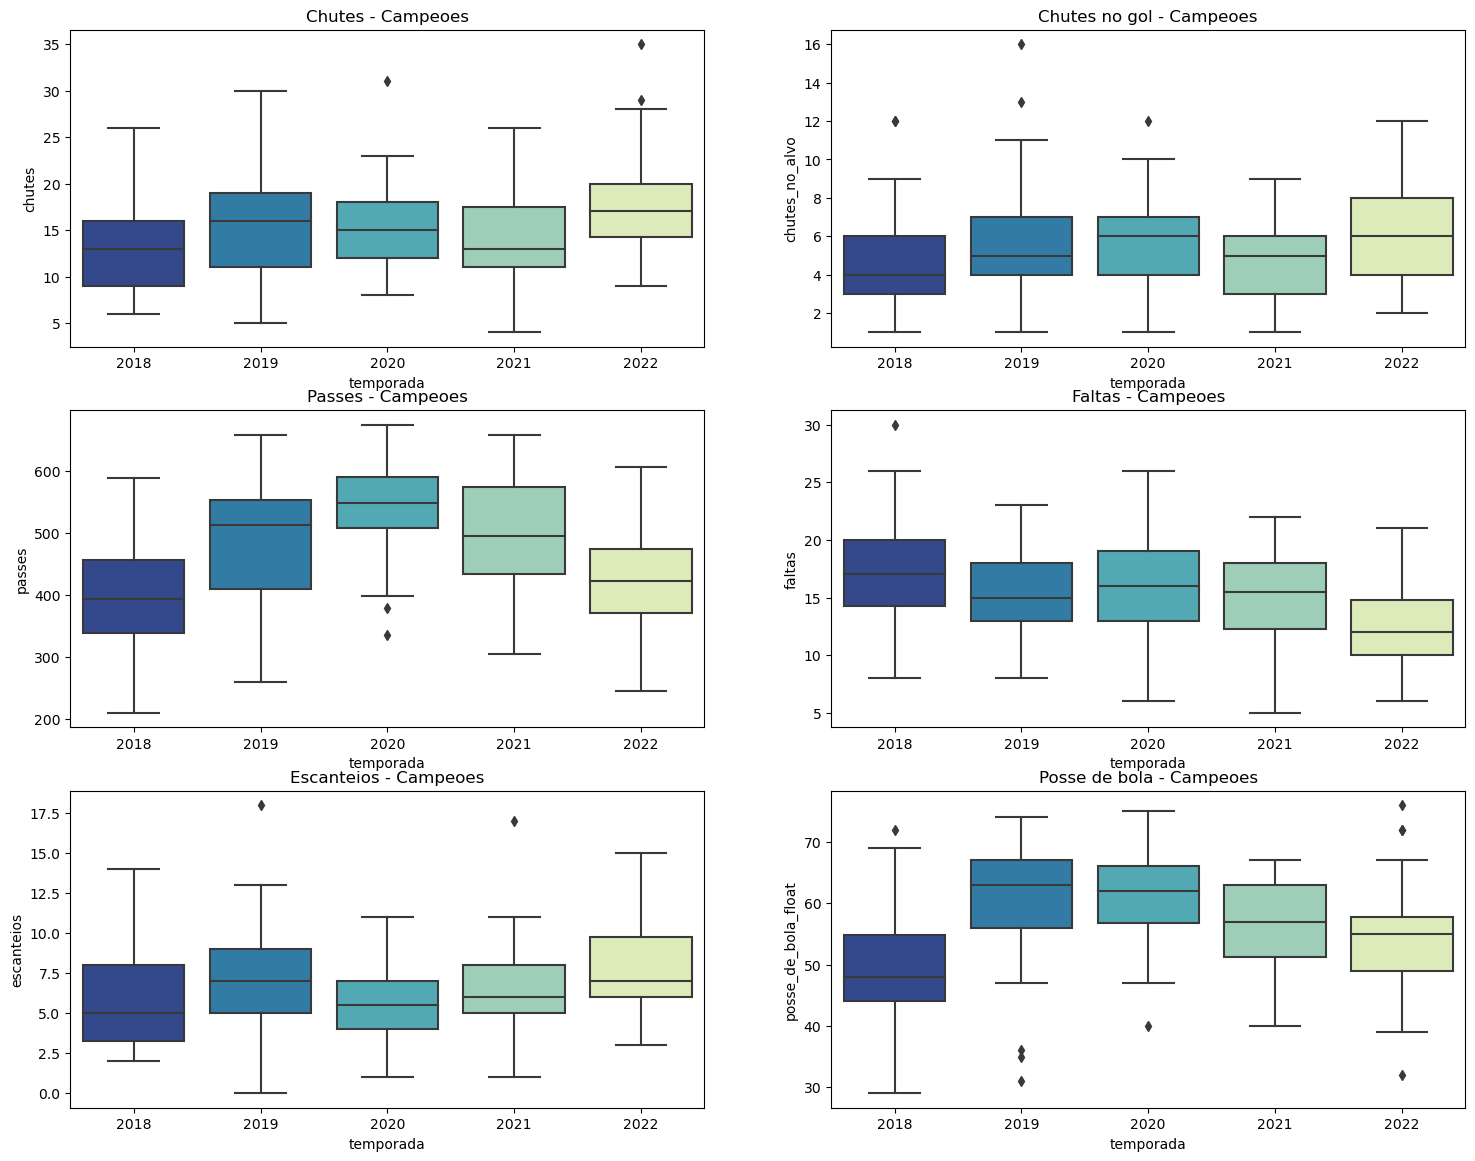

In [37]:
#Boxplot - estatisticas campeoes
fig, ax = plt.subplots(3,2, figsize = (18,14))

sns.boxplot(y=stats_total['chutes'], x=stats_total['temporada'], ax=ax[0,0], palette ='YlGnBu_r')
ax[0,0].set_title('Chutes - Campeoes')

sns.boxplot(y=stats_total['chutes_no_alvo'], x=stats_total['temporada'], ax=ax[0,1], palette ='YlGnBu_r')
ax[0,1].set_title('Chutes no gol - Campeoes')

sns.boxplot(y=stats_total['passes'], x=stats_total['temporada'], ax=ax[1,0], palette ='YlGnBu_r')
ax[1,0].set_title('Passes - Campeoes')

sns.boxplot(y=stats_total['faltas'], x=stats_total['temporada'], ax=ax[1,1], palette ='YlGnBu_r')
ax[1,1].set_title('Faltas - Campeoes')

sns.boxplot(y=stats_total['escanteios'], x=stats_total['temporada'], ax=ax[2,0], palette ='YlGnBu_r')
ax[2,0].set_title('Escanteios - Campeoes')

sns.boxplot(y=stats_total['posse_de_bola_float'], x=stats_total['temporada'], ax=ax[2,1], palette ='YlGnBu_r')
ax[2,1].set_title('Posse de bola - Campeoes')

In [38]:
stats_mean = stats_total.groupby(['temporada']).mean()
stats_mean = stats_mean.reset_index()
stats_mean.head()

C:\Users\horiu\AppData\Local\Temp\ipykernel_6772\3677374235.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stats_mean = stats_total.groupby(['temporada']).mean()


,temporada,partida_id,rodata_x,chutes,chutes_no_alvo,passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios,posse_de_bola_float,precisao_passes_float
0,2018,6315.710526,19.500000,13.526316,4.894737,403.052632,17.342105,3.078947,0.131579,1.815789,5.868421,49.394737,77.578947
1,2019,6693.189189,19.351351,15.594595,5.891892,494.054054,15.378378,2.216216,0.081081,0.864865,7.054054,59.594595,83.702703
2,2020,7075.421053,19.500000,15.236842,5.578947,538.473684,16.684211,2.315789,0.078947,1.473684,5.736842,60.868421,85.605263
3,2021,7455.078947,19.500000,14.157895,4.868421,500.447368,15.157895,2.000000,0.052632,1.289474,6.368421,56.578947,84.473684
4,2022,7835.815789,19.500000,17.789474,6.157895,426.105263,12.026316,1.921053,0.078947,2.421053,7.894737,54.552632,81.921053


Text(0.5, 1.0, 'Média de escanteios - Campeões por temporada')

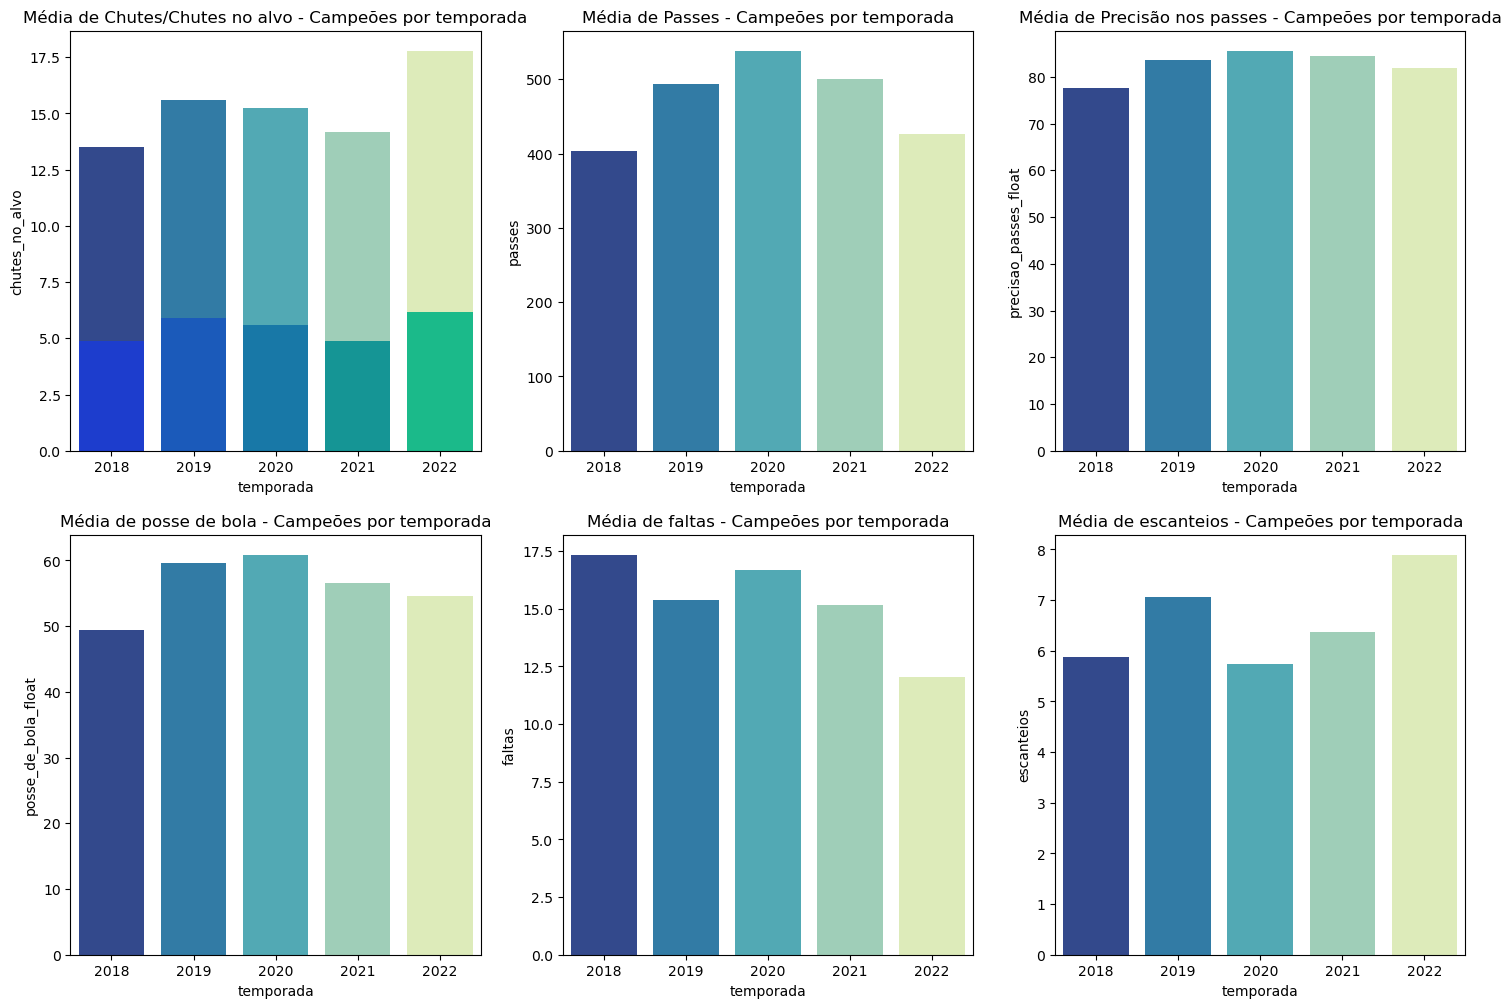

In [39]:
fig, ax = plt.subplots(2,3, figsize = (18,12))

sns.barplot(y='chutes', x='temporada', data = stats_mean, ax=ax[0,0], palette ='YlGnBu_r')
sns.barplot(y='chutes_no_alvo', x='temporada', data = stats_mean, ax=ax[0,0], palette ='winter')
ax[0,0].set_title('Média de Chutes/Chutes no alvo - Campeões por temporada')

sns.barplot(y='passes', x='temporada', data = stats_mean, ax=ax[0,1], palette ='YlGnBu_r')
ax[0,1].set_title('Média de Passes - Campeões por temporada')

sns.barplot(y='precisao_passes_float', x='temporada', data = stats_mean, ax=ax[0,2], palette ='YlGnBu_r')
ax[0,2].set_title('Média de Precisão nos passes - Campeões por temporada')

sns.barplot(y='posse_de_bola_float', x='temporada', data = stats_mean, ax=ax[1,0], palette ='YlGnBu_r')
ax[1,0].set_title('Média de posse de bola - Campeões por temporada')

sns.barplot(y='faltas', x='temporada', data = stats_mean, ax=ax[1,1], palette ='YlGnBu_r')
ax[1,1].set_title('Média de faltas - Campeões por temporada')

sns.barplot(y='escanteios', x='temporada', data = stats_mean, ax=ax[1,2], palette ='YlGnBu_r')
ax[1,2].set_title('Média de escanteios - Campeões por temporada')

Segue abaixo um comparativo das estatísticas disponibilizadas para os times campeões a partir de 2018:
* Os times campeões de 2019, 2020, 2021 e 2022 tem a maioria dos jogos com maior posse de bola que o adversário. O Flamengo campeão de 2022 se destaca tanto na quantidade de passes quanto na precisão, o que mostra a equipe com uma ideia mais propositiva. O Palmeiras de 2018 é única equipe campeã dos ultimos anos com uma ideia de jogo reativa mais evidente, com menos posse de bola e média menor de passes trocados.
* Quanto aos chutes, o campeão de 2022 possui a maior média de chutes e chutes no alvo por partida. Os times campeões possuem uma média de 5,47 chutes no alvo por partida.
* Em relação as faltas, o time mais faltoso é o de 2018, com média e mediana um pouco acima dos demais. Já o time que comete menos faltas é o campeão de 2022.
* Quanto aos escanteios, a maior média de escanteios por partida é do campeão de 2022.

## 4. Conclusão

Após as análises acima, é possivel concluir que o mandante leva vantagem em relação ao visitante, mas que, em geral, a falta da torcida nos estádios não teve um grande impacto no aproveitamento dos mandantes. Em relação aos clássicos, apesar de parecer ser comum resultados inesperados, os dados mostraram que normalmente o melhor time leva vantagem nos confrontos, principalmente nos clássicos paulistas e cariocas. Quanto a ideia do Guardiola sobre conquista de campeonatos, não se viu um paralelo com o que ocorre no campeonato brasileiro. Verificou-se um melhor desempenho do time campeão nas últimas 8 rodadas se comparado as 8 primeiras rodadas.

Quanto aos times campeões, temos diferentes estilos de jogo em cada ano. Pelos dados disponibilizados, o Palmeiras campeão de 2018 é o time com menor posse de bola e quantidade de passes, o que caracteriza o trabalho do técnico Luis Felipe Scolari. O Flamengo campeão de 2020 é a equipe com maior número de passes trocados, posse de bola e precisao nos passes. Essa equipe tem como base o elenco campeão da Libertadores e Brasileiro de 2019 comandada por Jorge Jesus e que encantou sua torcida, mas que passou por momentos conturbados após sua saída e a contratação de Rogério Ceni como novo treinador. Já o campeão de 2022 é o que tem maior média de chutes ao gol e escanteios, mas a posse de bola e o número de passes trocados não é tão grande, representando o Palmeiras de Abel Ferreira, com um estilo de jogo mais direto e com um grande repertório de jogadas ensaiadas em escanteios.